In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [84]:
da = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\2.4.2 drill data\table8.csv')
da

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000,nan


In [85]:
#first we need to fill in Nan values with 0 to avoid errors and get rid of the
#empty rows at the bottom
da.fillna(value=0)
da = da[0:348]

In [86]:
#as described in the drill, we only need population, murder, robbery, and 
#property crime so lets make a new dataframe and shorten the data set
dp = []
dp = da[['Population']]
dp['Murder'] = da[['Murder and\nnonnegligent\nmanslaughter']]
dp['Robbery'] = da[['Robbery']]
dp['Property_Crime'] = da[['Property\ncrime']]
dp

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Population,Murder,Robbery,Property_Crime
0,"1,861",0.000,0,12
1,"2,577",0.000,0,24
2,"2,846",0.000,0,16
3,"97,956",8.000,227,"4,090"
4,"6,388",0.000,4,223
5,"4,089",0.000,3,46
6,"1,781",0.000,0,10
7,"118,296",1.000,31,"2,118"
8,"9,519",0.000,4,210
9,"18,182",0.000,12,405


In [87]:
#we need to remove commas from the entries so that we can turn the data into
#integers that we can work with
dp['Population'] = dp.Population.str.replace(',','')
dp['Property_Crime'] = dp.Property_Crime.str.replace(',','')
dp['Robbery'] = dp.Robbery.str.replace(',','')
dp

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

,Population,Murder,Robbery,Property_Crime
0,1861,0.000,0,12
1,2577,0.000,0,24
2,2846,0.000,0,16
3,97956,8.000,227,4090
4,6388,0.000,4,223
5,4089,0.000,3,46
6,1781,0.000,0,10
7,118296,1.000,31,2118
8,9519,0.000,4,210
9,18182,0.000,12,405


In [88]:
dp['Population'] = pd.to_numeric(dp['Population'])
dp['Robbery'] = pd.to_numeric(dp['Robbery'])

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
#as described in the problem, we need to now create a population^2 column and 
#turn murder and robbery into a binary where 0=0 and any number above 0=1
dp['Population Squared'] = np.square(dp['Population'])
dp['Murder'] = np.where(dp['Murder'] >= 1, 1, 0)
dp['Robbery'] = np.where(dp['Robbery'] >= 1, 1, 0)
dp

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

,Population,Murder,Robbery,Property_Crime,Population Squared
0,1861,0,0,12,3463321
1,2577,0,0,24,6640929
2,2846,0,0,16,8099716
3,97956,1,1,4090,9595377936
4,6388,0,1,223,40806544
5,4089,0,1,46,16719921
6,1781,0,0,10,3171961
7,118296,1,1,2118,13993943616
8,9519,0,1,210,90611361
9,18182,0,1,405,330585124


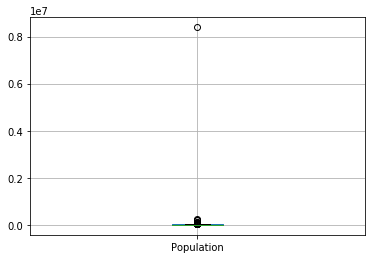

In [95]:
#let's check out data trends 
dp.boxplot(column = 'Population')

In [98]:
dp[dp['Population'] > 100000]['Population']

7       118296
35      258789
216    8396126
272     210562
310     143834
346     199134
Name: Population, dtype: int64

In [100]:
dp.loc[216]

Population                   8396126
Murder                             1
Robbery                            1
Property_Crime                141971
Population Squared    70494931807876
Name: 216, dtype: object

In [103]:
dp = dp.drop([216])

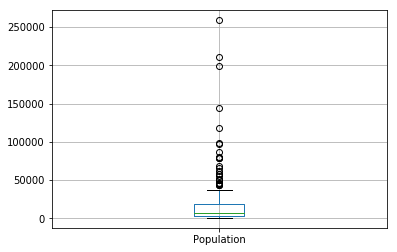

In [104]:
dp.boxplot(column = 'Population')